<a href="https://colab.research.google.com/github/sabiko1/Final-Project/blob/main/dense_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys

if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('drive/My Drive/') # 'My Drive' is the default name of Google Drives
    os.listdir()

# use os.chdir("my-directory") # to change directory, and
# os.listdir()                 # to list its contents
# os.getcwd()                  # to get the name of the current directory
# os.mkdir("my-new-dir")       # to create a new directory
# See: https://realpython.com/working-with-files-in-python/

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt

In [ ]:
# ファイルから読み込む
x = np.load('images.npy')
y = np.load('labels.npy')

In [ ]:
import numpy as np

train_ratio = 0.8 #define a ratio on train and test

train_images, test_images = np.split(x, [int(len(x) * train_ratio)])  # separate data with the ratio
train_targets, test_targets = np.split(y, [int(len(y) * train_ratio)]) # separate targets

In [ ]:
train_images = train_images.reshape((9660, 127 * 128)) # reshape flattens 127 x 128 arrays
test_images = test_images.reshape((2415, 127 * 128))   # to vectors of 16256 elements

train_images /= 16   # cast as floats
test_images /= 16     # and rescale to [0, 1]

In [ ]:
from tensorflow.keras.utils import to_categorical # encode with the nifty `to_categorical` function

train_labels = to_categorical(train_targets)
test_labels  = to_categorical(test_targets)

In [ ]:
import keras
from keras import layers

inputs = keras.Input(shape=(127*128,))

# dense layers
x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)　#増えた
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model2 = keras.Model(inputs=inputs, outputs=outputs, name="model1")

# show the model1
keras.utils.plot_model(model2, "model1.png", show_shapes=True)
model2.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense_4 (Dense)             (None, 512)               8323584   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 75)                19275     
                                                                 
Total params: 8,539,979
Trainable params: 8,539,979
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # Early stop if val_loss sees no improvement

history2 = model2.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback]) # 0.2 for validation

Epoch 1/15
61/61 [==============================] - 15s 226ms/step - loss: 2.9972 - accuracy: 0.2645 - val_loss: 2.4585 - val_accuracy: 0.3566
Epoch 2/15
61/61 [==============================] - 13s 211ms/step - loss: 1.5116 - accuracy: 0.6022 - val_loss: 1.8700 - val_accuracy: 0.5078
Epoch 3/15
61/61 [==============================] - 12s 191ms/step - loss: 0.9906 - accuracy: 0.7275 - val_loss: 1.6202 - val_accuracy: 0.5730
Epoch 4/15
61/61 [==============================] - 12s 188ms/step - loss: 0.6516 - accuracy: 0.8157 - val_loss: 1.5424 - val_accuracy: 0.5937
Epoch 5/15
61/61 [==============================] - 13s 215ms/step - loss: 0.4198 - accuracy: 0.8788 - val_loss: 1.7410 - val_accuracy: 0.5538
Epoch 6/15
61/61 [==============================] - 13s 221ms/step - loss: 0.2819 - accuracy: 0.9209 - val_loss: 1.4741 - val_accuracy: 0.6190
Epoch 7/15
61/61 [==============================] - 14s 225ms/step - loss: 0.1717 - accuracy: 0.9559 - val_loss: 1.6357 - val_accuracy: 0.6020

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(x):

    history_dict = x.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

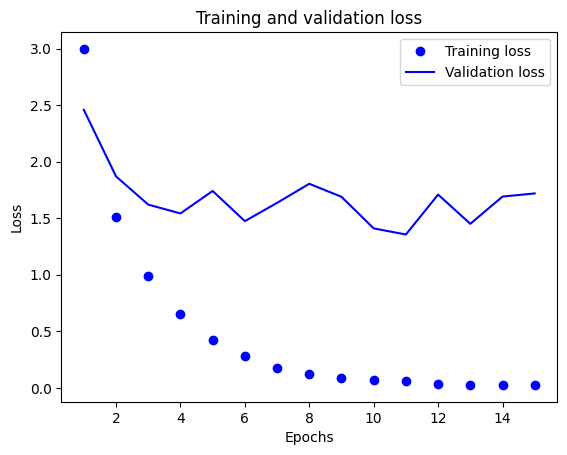

In [ ]:
plot_loss(history2)

In [ ]:
model1_loss, model1_acc = model2.evaluate(test_images, test_labels)

print('model2_acc:', model1_acc)

76/76 [==============================] - 1s 19ms/step - loss: 1.5686 - accuracy: 0.7242
model2_acc: 0.7242236137390137


In [ ]:
inputs = keras.Input(shape=(127*128,))

# dense layers
x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model3 = keras.Model(inputs=inputs, outputs=outputs, name="model3")

# show the model1
keras.utils.plot_model(model3, "model3.png", show_shapes=True)
model3.summary()

Model: "model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense_8 (Dense)             (None, 512)               8323584   
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dense_12 (Dense)            (None, 75)                19275     
                                                                 
Total params: 8,802,635
Trainable params: 8,802,635
Non-trai

In [ ]:
model3.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # Early stop if val_loss sees no improvement

history3 = model3.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 15s 239ms/step - loss: 3.3190 - accuracy: 0.1822 - val_loss: 2.7287 - val_accuracy: 0.2702
Epoch 2/15
61/61 [==============================] - 14s 234ms/step - loss: 1.6767 - accuracy: 0.5367 - val_loss: 1.9543 - val_accuracy: 0.4648
Epoch 3/15
61/61 [==============================] - 13s 220ms/step - loss: 1.0613 - accuracy: 0.6891 - val_loss: 1.5596 - val_accuracy: 0.5523
Epoch 4/15
61/61 [==============================] - 14s 228ms/step - loss: 0.6774 - accuracy: 0.7939 - val_loss: 1.5534 - val_accuracy: 0.5709
Epoch 5/15
61/61 [==============================] - 14s 237ms/step - loss: 0.4264 - accuracy: 0.8630 - val_loss: 1.3548 - val_accuracy: 0.6341
Epoch 6/15
61/61 [==============================] - 13s 206ms/step - loss: 0.3004 - accuracy: 0.9017 - val_loss: 1.4527 - val_accuracy: 0.6211
Epoch 7/15
61/61 [==============================] - 14s 228ms/step - loss: 0.1839 - accuracy: 0.9438 - val_loss: 1.4565 - val_accuracy: 0.6532

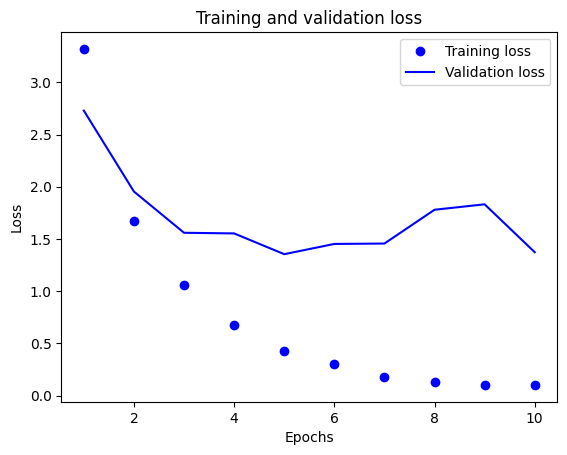

In [ ]:
plot_loss(history3)

In [ ]:
model1_loss, model1_acc = model3.evaluate(test_images, test_labels)

print('model3_acc:', model1_acc)

76/76 [==============================] - 2s 28ms/step - loss: 1.3249 - accuracy: 0.6766
model3_acc: 0.6766045689582825


In [ ]:
import keras
from keras import layers

inputs = keras.Input(shape=(127*128,))

# dense layers
x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model4 = keras.Model(inputs=inputs, outputs=outputs, name="model3")

# show the model1
keras.utils.plot_model(model4, "model4.png", show_shapes=True)
model4.summary()

Model: "model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense (Dense)               (None, 512)               8323584   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 75)                19275

In [ ]:
model4.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history4 = model4.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 15s 221ms/step - loss: 3.7398 - accuracy: 0.0911 - val_loss: 3.0432 - val_accuracy: 0.2340
Epoch 2/15
61/61 [==============================] - 12s 197ms/step - loss: 2.1390 - accuracy: 0.4005 - val_loss: 2.3372 - val_accuracy: 0.3582
Epoch 3/15
61/61 [==============================] - 14s 228ms/step - loss: 1.3202 - accuracy: 0.6122 - val_loss: 1.8132 - val_accuracy: 0.5016
Epoch 4/15
61/61 [==============================] - 14s 234ms/step - loss: 0.8248 - accuracy: 0.7428 - val_loss: 1.7167 - val_accuracy: 0.5393
Epoch 5/15
61/61 [==============================] - 13s 219ms/step - loss: 0.5701 - accuracy: 0.8195 - val_loss: 1.2096 - val_accuracy: 0.6454
Epoch 6/15
61/61 [==============================] - 15s 245ms/step - loss: 0.3734 - accuracy: 0.8804 - val_loss: 1.7359 - val_accuracy: 0.5709
Epoch 7/15
61/61 [==============================] - 14s 223ms/step - loss: 0.2762 - accuracy: 0.9145 - val_loss: 1.3067 - val_accuracy: 0.6703

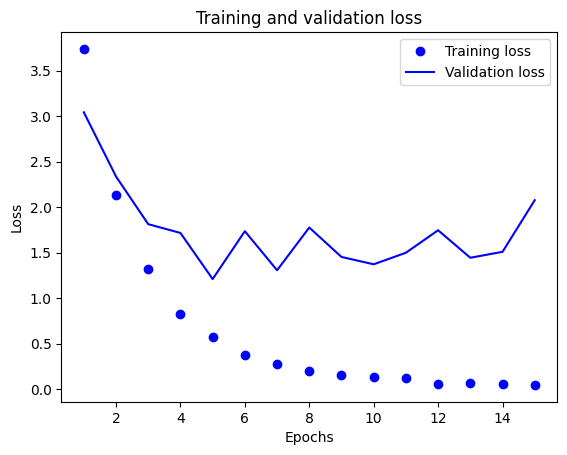

In [ ]:
plot_loss(history4)

In [ ]:
model1_loss, model1_acc = model4.evaluate(test_images, test_labels)

print('model4_acc:', model1_acc)

76/76 [==============================] - 2s 24ms/step - loss: 1.0934 - accuracy: 0.6936
model4_acc: 0.693581759929657


In [ ]:
import keras
from keras import layers

inputs = keras.Input(shape=(127*128,))

# dense layers
x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dense(512, activation='relu')(x) #ここ増やした
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model5 = keras.Model(inputs=inputs, outputs=outputs, name="model5")

# show the model1
keras.utils.plot_model(model5, "model5.png", show_shapes=True)
model5.summary()

Model: "model5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense (Dense)               (None, 512)               8323584   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 75)                19275     
                                                                 
Total params: 8736843 (33.33 MB)
Trainable params: 8736843 (33.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model5.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history5 = model5.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 8s 23ms/step - loss: 2.9784 - accuracy: 0.2655 - val_loss: 2.5117 - val_accuracy: 0.3447
Epoch 2/15
61/61 [==============================] - 1s 14ms/step - loss: 1.4403 - accuracy: 0.6131 - val_loss: 1.8589 - val_accuracy: 0.5104
Epoch 3/15
61/61 [==============================] - 1s 13ms/step - loss: 0.9047 - accuracy: 0.7479 - val_loss: 1.8552 - val_accuracy: 0.4959
Epoch 4/15
61/61 [==============================] - 1s 13ms/step - loss: 0.5554 - accuracy: 0.8373 - val_loss: 1.6476 - val_accuracy: 0.5487
Epoch 5/15
61/61 [==============================] - 1s 13ms/step - loss: 0.3439 - accuracy: 0.9027 - val_loss: 1.1601 - val_accuracy: 0.6786
Epoch 6/15
61/61 [==============================] - 1s 12ms/step - loss: 0.2110 - accuracy: 0.9380 - val_loss: 1.3391 - val_accuracy: 0.6454
Epoch 7/15
61/61 [==============================] - 1s 12ms/step - loss: 0.1257 - accuracy: 0.9660 - val_loss: 1.2920 - val_accuracy: 0.6677
Epoch 8/15
61

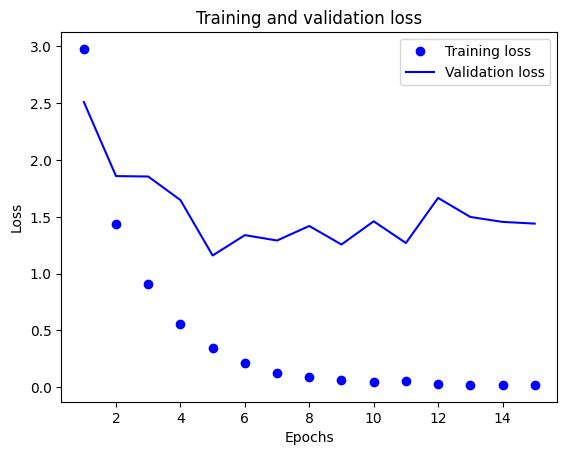

In [ ]:
plot_loss(history5)

In [ ]:
model1_loss, model1_acc = model5.evaluate(test_images, test_labels)

print('model5_acc:', model1_acc)

76/76 [==============================] - 0s 4ms/step - loss: 1.0377 - accuracy: 0.7226
model5_acc: 0.7225672602653503


In [ ]:
inputs = keras.Input(shape=(127*128,))

# dense layers
x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dense(512, activation='relu')(x) #ここ増やした
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model6 = keras.Model(inputs=inputs, outputs=outputs, name="model6")

# show the model1
keras.utils.plot_model(model6, "model6.png", show_shapes=True)
model6.summary()

Model: "model6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense (Dense)               (None, 512)               8323584   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 75)                38475     
                                                                 
Total params: 8,887,371
Trainable params: 8,887,371
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model6.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history6 = model6.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 18s 255ms/step - loss: 2.9930 - accuracy: 0.2528 - val_loss: 2.3047 - val_accuracy: 0.4006
Epoch 2/15
61/61 [==============================] - 13s 212ms/step - loss: 1.4325 - accuracy: 0.6137 - val_loss: 1.8201 - val_accuracy: 0.5212
Epoch 3/15
61/61 [==============================] - 12s 187ms/step - loss: 0.8760 - accuracy: 0.7519 - val_loss: 1.5258 - val_accuracy: 0.5828
Epoch 4/15
61/61 [==============================] - 13s 217ms/step - loss: 0.5179 - accuracy: 0.8487 - val_loss: 1.3251 - val_accuracy: 0.6201
Epoch 5/15
61/61 [==============================] - 13s 219ms/step - loss: 0.3277 - accuracy: 0.9006 - val_loss: 1.2597 - val_accuracy: 0.6558
Epoch 6/15
61/61 [==============================] - 15s 239ms/step - loss: 0.2066 - accuracy: 0.9423 - val_loss: 1.2833 - val_accuracy: 0.6661
Epoch 7/15
61/61 [==============================] - 13s 222ms/step - loss: 0.1541 - accuracy: 0.9569 - val_loss: 1.2866 - val_accuracy: 0.6641

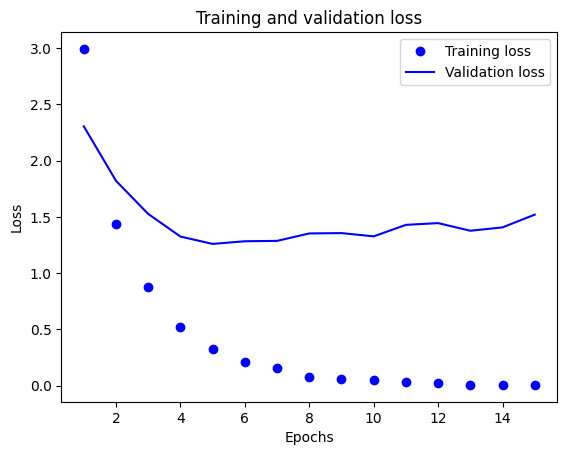

In [ ]:
plot_loss(history6)

In [ ]:
model1_loss, model1_acc = model6.evaluate(test_images, test_labels)

print('model6_acc:', model1_acc)

76/76 [==============================] - 2s 24ms/step - loss: 1.1632 - accuracy: 0.6911
model6_acc: 0.6910973191261292


In [ ]:
inputs = keras.Input(shape=(127*128,))

# dense layers
x = layers.Dense(512, activation='gelu')(inputs) #gelu(inputs)
x = layers.Dense(512, activation='gelu')(x)
x = layers.Dense(256, activation='gelu')(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model7 = keras.Model(inputs=inputs, outputs=outputs, name="model7")

# show the model1
keras.utils.plot_model(model7, "model7.png", show_shapes=True)
model7.summary()

Model: "model7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense_8 (Dense)             (None, 512)               8323584   
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 75)                19275     
                                                                 
Total params: 8736843 (33.33 MB)
Trainable params: 8736843 (33.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model7.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history7 = model7.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 3s 24ms/step - loss: 3.0375 - accuracy: 0.2706 - val_loss: 2.6690 - val_accuracy: 0.3349
Epoch 2/15
61/61 [==============================] - 1s 16ms/step - loss: 1.4338 - accuracy: 0.6218 - val_loss: 1.8381 - val_accuracy: 0.5228
Epoch 3/15
61/61 [==============================] - 1s 16ms/step - loss: 0.8851 - accuracy: 0.7544 - val_loss: 1.4491 - val_accuracy: 0.6289
Epoch 4/15
61/61 [==============================] - 1s 14ms/step - loss: 0.5558 - accuracy: 0.8376 - val_loss: 1.3215 - val_accuracy: 0.6486
Epoch 5/15
61/61 [==============================] - 1s 13ms/step - loss: 0.3487 - accuracy: 0.8925 - val_loss: 1.2353 - val_accuracy: 0.6641
Epoch 6/15
61/61 [==============================] - 1s 13ms/step - loss: 0.2297 - accuracy: 0.9308 - val_loss: 1.2113 - val_accuracy: 0.6594
Epoch 7/15
61/61 [==============================] - 1s 13ms/step - loss: 0.1427 - accuracy: 0.9604 - val_loss: 1.2784 - val_accuracy: 0.6853
Epoch 8/15
61

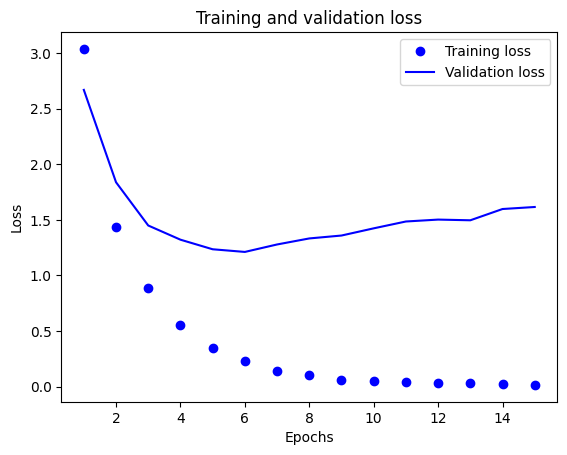

In [ ]:
plot_loss(history7)

In [ ]:
model1_loss, model1_acc = model7.evaluate(test_images, test_labels)

print('model7_acc:', model1_acc)

76/76 [==============================] - 0s 4ms/step - loss: 1.5174 - accuracy: 0.7590
model7_acc: 0.7590062022209167


In [ ]:

inputs = keras.Input(shape=(127*128,))

# dense layers
dense = layers.Dense(512, activation='gelu')
x = dense(inputs)
x = layers.Dense(512, activation='gelu')(x) #ここいい法で
x = layers.Dense(256, activation='gelu')(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model8 = keras.Model(inputs=inputs, outputs=outputs, name="model8")

# show the model1
keras.utils.plot_model(model8, "model8.png", show_shapes=True)
model8.summary()

Model: "model8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense_16 (Dense)            (None, 512)               8323584   
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 75)                19275     
                                                                 
Total params: 8736843 (33.33 MB)
Trainable params: 8736843 (33.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model8.compile(
    loss='categorical_crossentropy',
    optimizer='adam', # adam で
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history8 = model8.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 3s 23ms/step - loss: 2.5857 - accuracy: 0.3797 - val_loss: 1.8949 - val_accuracy: 0.5399
Epoch 2/15
61/61 [==============================] - 1s 15ms/step - loss: 1.0204 - accuracy: 0.7270 - val_loss: 1.4416 - val_accuracy: 0.6247
Epoch 3/15
61/61 [==============================] - 1s 18ms/step - loss: 0.5384 - accuracy: 0.8503 - val_loss: 1.3158 - val_accuracy: 0.6470
Epoch 4/15
61/61 [==============================] - 1s 20ms/step - loss: 0.2927 - accuracy: 0.9182 - val_loss: 1.2693 - val_accuracy: 0.6765
Epoch 5/15
61/61 [==============================] - 2s 25ms/step - loss: 0.1762 - accuracy: 0.9555 - val_loss: 1.2701 - val_accuracy: 0.6760
Epoch 6/15
61/61 [==============================] - 2s 29ms/step - loss: 0.1184 - accuracy: 0.9705 - val_loss: 1.2606 - val_accuracy: 0.6879
Epoch 7/15
61/61 [==============================] - 1s 20ms/step - loss: 0.0592 - accuracy: 0.9882 - val_loss: 1.3960 - val_accuracy: 0.6951
Epoch 8/15
61

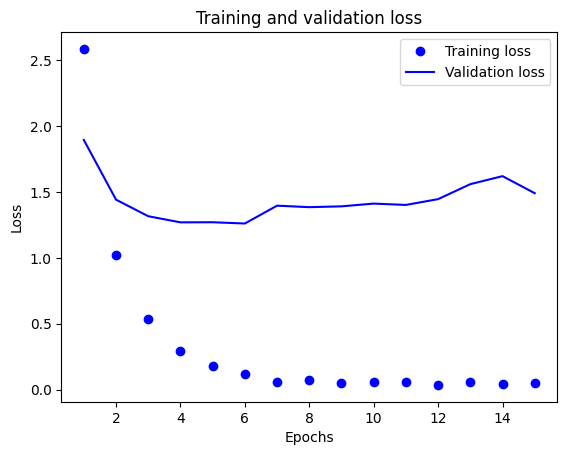

In [ ]:
plot_loss(history8)

In [ ]:
model1_loss, model1_acc = model8.evaluate(test_images, test_labels)

print('model8_acc:', model1_acc)

76/76 [==============================] - 0s 6ms/step - loss: 1.4002 - accuracy: 0.7400
model8_acc: 0.7399585843086243


ここまでだとModel7が一番良さそう。

Model2改

In [ ]:
import keras
from keras import layers

inputs = keras.Input(shape=(127*128,))

# dense layers
x = layers.Dense(512, activation='gelu')(inputs) #gelu
x = layers.Dense(256, activation='gelu')(x)
x = layers.Dense(256, activation='gelu')(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model22 = keras.Model(inputs=inputs, outputs=outputs, name="model22")

# show the model1
keras.utils.plot_model(model22, "model22.png", show_shapes=True)
model22.summary()

Model: "model22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense (Dense)               (None, 512)               8323584   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 75)                19275     
                                                                 
Total params: 8,539,979
Trainable params: 8,539,979
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model22.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop', # rmsprop で
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history22 = model22.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 17s 266ms/step - loss: 3.0933 - accuracy: 0.2528 - val_loss: 2.4143 - val_accuracy: 0.4156
Epoch 2/15
61/61 [==============================] - 13s 217ms/step - loss: 1.4978 - accuracy: 0.6143 - val_loss: 1.9140 - val_accuracy: 0.5186
Epoch 3/15
61/61 [==============================] - 12s 190ms/step - loss: 0.9430 - accuracy: 0.7475 - val_loss: 1.5329 - val_accuracy: 0.5947
Epoch 4/15
61/61 [==============================] - 12s 197ms/step - loss: 0.6207 - accuracy: 0.8266 - val_loss: 1.3769 - val_accuracy: 0.6310
Epoch 5/15
61/61 [==============================] - 14s 231ms/step - loss: 0.4103 - accuracy: 0.8850 - val_loss: 1.2073 - val_accuracy: 0.6718
Epoch 6/15
61/61 [==============================] - 13s 216ms/step - loss: 0.2670 - accuracy: 0.9253 - val_loss: 1.2947 - val_accuracy: 0.6558
Epoch 7/15
61/61 [==============================] - 14s 224ms/step - loss: 0.1711 - accuracy: 0.9557 - val_loss: 1.3045 - val_accuracy: 0.6775

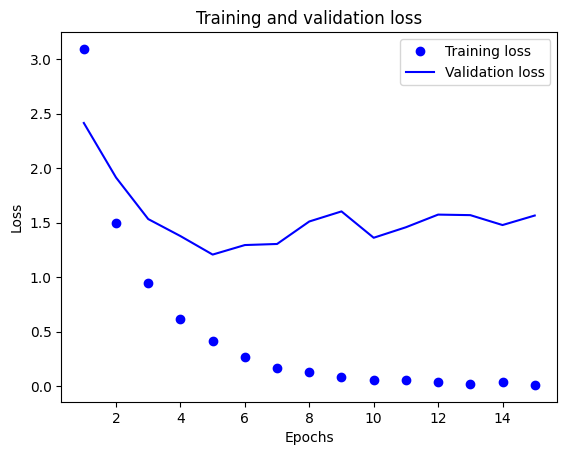

In [ ]:
plot_loss(history22)

In [ ]:
model1_loss, model1_acc = model22.evaluate(test_images, test_labels)

print('model22_acc:', model1_acc)

76/76 [==============================] - 2s 20ms/step - loss: 1.0949 - accuracy: 0.7271
model22_acc: 0.7271221280097961


L2 regularization

In [ ]:
from tensorflow.keras import regularizers

inputs = keras.Input(shape=(127*128,))

# dense layers
dense = layers.Dense(512, kernel_regularizer=regularizers.l2(0.02), activation='gelu') #gelu
x = dense(inputs)
x = layers.Dense(512, kernel_regularizer=regularizers.l2(0.02), activation='gelu')(x)
x = layers.Dense(256, kernel_regularizer=regularizers.l2(0.02), activation='gelu')(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model9 = keras.Model(inputs=inputs, outputs=outputs, name="model9")

# show the model1
keras.utils.plot_model(model9, "model9.png", show_shapes=True)
model9.summary()

model9.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

Model: "model9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense (Dense)               (None, 512)               8323584   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 75)                19275     
                                                                 
Total params: 8,736,843
Trainable params: 8,736,843
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history9 = model9.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 15s 221ms/step - loss: 10.9532 - accuracy: 0.0245 - val_loss: 4.7613 - val_accuracy: 0.0135
Epoch 2/15
61/61 [==============================] - 11s 173ms/step - loss: 4.3942 - accuracy: 0.0109 - val_loss: 4.3175 - val_accuracy: 0.0135
Epoch 3/15
61/61 [==============================] - 11s 184ms/step - loss: 4.3183 - accuracy: 0.0096 - val_loss: 4.3175 - val_accuracy: 0.0135
Epoch 4/15
61/61 [==============================] - 12s 203ms/step - loss: 4.3182 - accuracy: 0.0096 - val_loss: 4.3175 - val_accuracy: 0.0135
Epoch 5/15
61/61 [==============================] - 11s 184ms/step - loss: 4.3183 - accuracy: 0.0118 - val_loss: 4.3175 - val_accuracy: 0.0129
Epoch 6/15
61/61 [==============================] - 10s 168ms/step - loss: 4.3182 - accuracy: 0.0110 - val_loss: 4.3175 - val_accuracy: 0.0135
Epoch 7/15
61/61 [==============================] - 14s 229ms/step - loss: 4.3182 - accuracy: 0.0107 - val_loss: 4.3175 - val_accuracy: 0.012

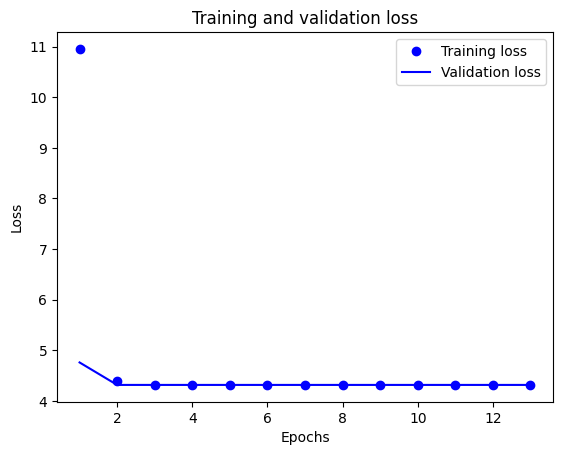

In [ ]:
plot_loss(history9)

In [ ]:
model1_loss, model1_acc = model9.evaluate(test_images, test_labels)

print('model9_acc:', model1_acc)

76/76 [==============================] - 2s 22ms/step - loss: 4.3175 - accuracy: 0.0133
model9_acc: 0.013250517658889294


In [ ]:
# dense layers
dense = layers.Dense(512, kernel_regularizer=regularizers.l2(0.02), activation='gelu') #gelu
x = dense(inputs)
x = layers.Dense(512, activation='gelu')(x)
x = layers.Dense(256, activation='gelu')(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model10 = keras.Model(inputs=inputs, outputs=outputs, name="model10")

# show the model1
keras.utils.plot_model(model10, "model10.png", show_shapes=True)
model10.summary()

model10.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

Model: "model10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense_8 (Dense)             (None, 512)               8323584   
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 75)                19275     
                                                                 
Total params: 8,736,843
Trainable params: 8,736,843
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history10 = model10.fit(train_images, train_labels, validation_split=0.2, epochs=30, batch_size=128, callbacks=[callback])

Epoch 1/30
61/61 [==============================] - 15s 230ms/step - loss: 5.7147 - accuracy: 0.1024 - val_loss: 3.7043 - val_accuracy: 0.2143
Epoch 2/30
61/61 [==============================] - 13s 214ms/step - loss: 3.1814 - accuracy: 0.3283 - val_loss: 3.4255 - val_accuracy: 0.3033
Epoch 3/30
61/61 [==============================] - 13s 211ms/step - loss: 2.8141 - accuracy: 0.4252 - val_loss: 3.1832 - val_accuracy: 0.3313
Epoch 4/30
61/61 [==============================] - 16s 264ms/step - loss: 2.5749 - accuracy: 0.4776 - val_loss: 3.1936 - val_accuracy: 0.3256
Epoch 5/30
61/61 [==============================] - 11s 187ms/step - loss: 2.4048 - accuracy: 0.5173 - val_loss: 2.7200 - val_accuracy: 0.4534
Epoch 6/30
61/61 [==============================] - 13s 205ms/step - loss: 2.2683 - accuracy: 0.5483 - val_loss: 2.5897 - val_accuracy: 0.4591
Epoch 7/30
61/61 [==============================] - 13s 220ms/step - loss: 2.1165 - accuracy: 0.5791 - val_loss: 2.9826 - val_accuracy: 0.3701

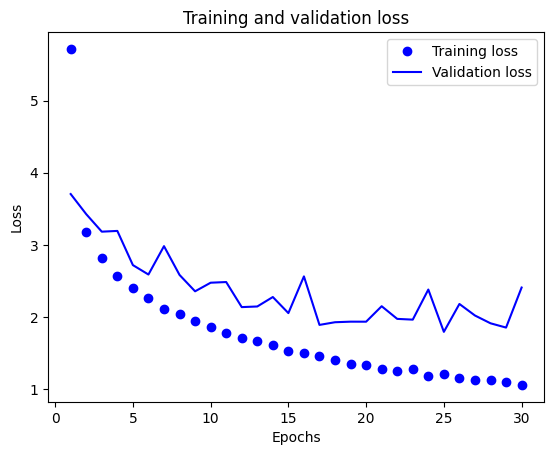

In [ ]:
plot_loss(history10)

In [ ]:
model1_loss, model1_acc = model10.evaluate(test_images, test_labels)

print('model10_acc:', model1_acc)

76/76 [==============================] - 2s 21ms/step - loss: 2.3498 - accuracy: 0.5867
model10_acc: 0.5867494940757751


正規化の場所が悪い

In [ ]:
from tensorflow.keras import regularizers

inputs = keras.Input(shape=(127*128,))

# dense layers
x = layers.Dense(512, activation='gelu')(inputs)
x = layers.Dense(512, kernel_regularizer=regularizers.l2(0.02), activation='gelu')(x)
x = layers.Dense(256, activation='gelu')(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
modelL2 = keras.Model(inputs=inputs, outputs=outputs, name="modelL2")

# show the model1
keras.utils.plot_model(modelL2, "modelL2.png", show_shapes=True)
modelL2.summary()

modelL2.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

historyL2 = modelL2.fit(train_images, train_labels, validation_split=0.2, epochs=30, batch_size=128, callbacks=[callback])

Model: "modelL2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense (Dense)               (None, 512)               8323584   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 75)                19275     
                                                                 
Total params: 8,736,843
Trainable params: 8,736,843
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
61/61 [==============================]

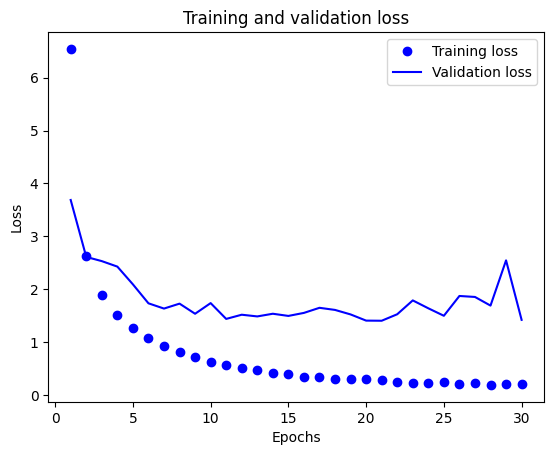

In [ ]:
plot_loss(historyL2)

In [ ]:
model1_loss, model1_acc = modelL2.evaluate(test_images, test_labels)

print('modelL2_acc:', model1_acc)

76/76 [==============================] - 2s 25ms/step - loss: 1.2928 - accuracy: 0.7453
modelL2_acc: 0.7453415989875793


dropout

In [ ]:
inputs = keras.Input(shape=(127*128,))

# dense layers
dense = layers.Dense(512, activation='gelu') #gelu
x = dense(inputs)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='gelu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='gelu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model11 = keras.Model(inputs=inputs, outputs=outputs, name="model11")

# show the model1
keras.utils.plot_model(model11, "model10.png", show_shapes=True)
model11.summary()

model11.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

Model: "model11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense_20 (Dense)            (None, 512)               8323584   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0   

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history11 = model11.fit(train_images, train_labels, validation_split=0.2, epochs=30, batch_size=128, callbacks=[callback])

Epoch 1/30
61/61 [==============================] - 13s 204ms/step - loss: 3.7584 - accuracy: 0.1090 - val_loss: 3.0721 - val_accuracy: 0.3235
Epoch 2/30
61/61 [==============================] - 11s 179ms/step - loss: 2.6325 - accuracy: 0.3222 - val_loss: 2.3013 - val_accuracy: 0.4720
Epoch 3/30
61/61 [==============================] - 19s 313ms/step - loss: 2.0011 - accuracy: 0.4613 - val_loss: 1.8750 - val_accuracy: 0.5388
Epoch 4/30
61/61 [==============================] - 13s 205ms/step - loss: 1.6236 - accuracy: 0.5424 - val_loss: 1.5780 - val_accuracy: 0.5968
Epoch 5/30
61/61 [==============================] - 13s 222ms/step - loss: 1.3380 - accuracy: 0.6132 - val_loss: 1.4206 - val_accuracy: 0.6190
Epoch 6/30
61/61 [==============================] - 12s 205ms/step - loss: 1.1670 - accuracy: 0.6497 - val_loss: 1.3147 - val_accuracy: 0.6335
Epoch 7/30
61/61 [==============================] - 12s 199ms/step - loss: 0.9775 - accuracy: 0.7013 - val_loss: 1.2392 - val_accuracy: 0.6605

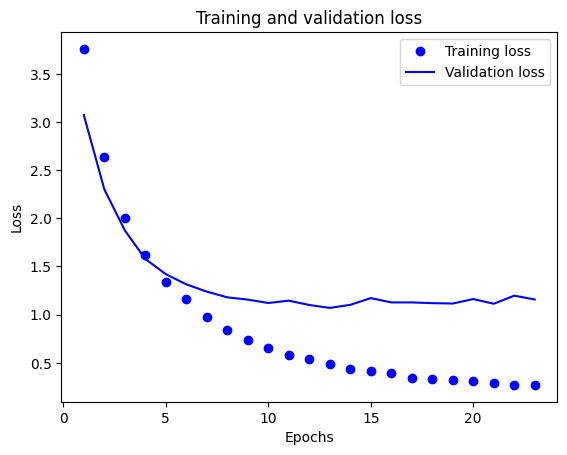

In [ ]:
plot_loss(history11)

In [ ]:
model1_loss, model1_acc = model11.evaluate(test_images, test_labels)

print('model11_acc:', model1_acc)

76/76 [==============================] - 3s 32ms/step - loss: 0.8878 - accuracy: 0.7565
model11_acc: 0.7565217614173889


In [ ]:
inputs = keras.Input(shape=(127*128,))

# dense layers
dense = layers.Dense(512, activation='gelu') #gelu
x = dense(inputs)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, kernel_regularizer=regularizers.l2(0.02), activation='gelu')(x)
x = layers.Dense(256, activation='gelu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model12 = keras.Model(inputs=inputs, outputs=outputs, name="model12")

# show the model1
# keras.utils.plot_model(model12, "model12.png", show_shapes=True)
model12.summary()

model12.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

Model: "model12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense_4 (Dense)             (None, 512)               8323584   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 75)                1927

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history12 = model12.fit(train_images, train_labels, validation_split=0.2, epochs=40, batch_size=128, callbacks=[callback])

Epoch 1/40
61/61 [==============================] - 14s 202ms/step - loss: 6.8287 - accuracy: 0.0855 - val_loss: 4.0556 - val_accuracy: 0.2143
Epoch 2/40
61/61 [==============================] - 15s 240ms/step - loss: 3.2588 - accuracy: 0.2878 - val_loss: 2.9468 - val_accuracy: 0.4327
Epoch 3/40
61/61 [==============================] - 14s 234ms/step - loss: 2.5229 - accuracy: 0.4242 - val_loss: 2.5646 - val_accuracy: 0.4700
Epoch 4/40
61/61 [==============================] - 14s 224ms/step - loss: 2.1438 - accuracy: 0.5163 - val_loss: 2.2959 - val_accuracy: 0.5129
Epoch 5/40
61/61 [==============================] - 17s 278ms/step - loss: 1.8856 - accuracy: 0.5697 - val_loss: 2.0390 - val_accuracy: 0.5559
Epoch 6/40
61/61 [==============================] - 13s 219ms/step - loss: 1.6663 - accuracy: 0.6149 - val_loss: 1.8699 - val_accuracy: 0.5989
Epoch 7/40
61/61 [==============================] - 11s 185ms/step - loss: 1.4958 - accuracy: 0.6659 - val_loss: 1.8653 - val_accuracy: 0.5782

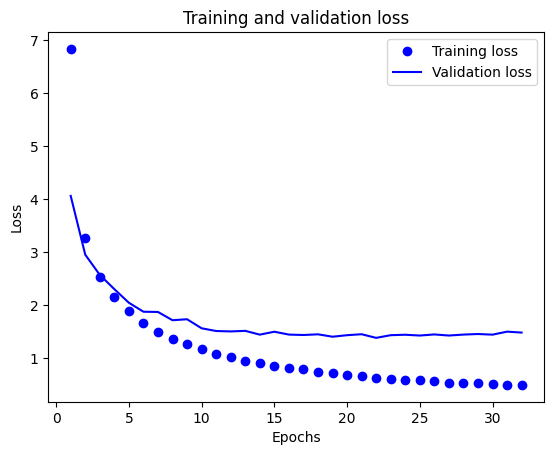

In [ ]:
plot_loss(history12)

In [ ]:
model1_loss, model1_acc = model12.evaluate(test_images, test_labels)

print('model12_acc:', model1_acc)

76/76 [==============================] - 3s 38ms/step - loss: 1.2617 - accuracy: 0.7391
model12_acc: 0.739130437374115
